In [75]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos,exp
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [76]:
# Define the variable and the function to approximate
x = sy.Symbol('x')
f = 3*exp(x) / (x**2 + x + 1)

In [77]:
# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

In [78]:
# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

Taylor expansion at n=1 3
Values: 3
Taylor expansion at n=2 3 - 3*x**2/2
Values: -10.5000000000000
Taylor expansion at n=3 2*x**3 - 3*x**2/2 + 3
Values: 43.5000000000000
Taylor expansion at n=4 -3*x**4/8 + 2*x**3 - 3*x**2/2 + 3
Values: 13.1250000000000
Taylor expansion at n=5 -8*x**5/5 - 3*x**4/8 + 2*x**3 - 3*x**2/2 + 3
Values: -375.675000000000
Taylor expansion at n=6 95*x**6/48 - 8*x**5/5 - 3*x**4/8 + 2*x**3 - 3*x**2/2 + 3
Values: 1067.13750000000
Taylor expansion at n=7 -53*x**7/140 + 95*x**6/48 - 8*x**5/5 - 3*x**4/8 + 2*x**3 - 3*x**2/2 + 3
Values: 239.201785714286
Taylor expansion at n=8 -3073*x**8/1920 - 53*x**7/140 + 95*x**6/48 - 8*x**5/5 - 3*x**4/8 + 2*x**3 - 3*x**2/2 + 3
Values: -10261.8154017857
Taylor expansion at n=9 7481*x**9/3780 - 3073*x**8/1920 - 53*x**7/140 + 95*x**6/48 - 8*x**5/5 - 3*x**4/8 + 2*x**3 - 3*x**2/2 + 3
Values: 28692.8203125000


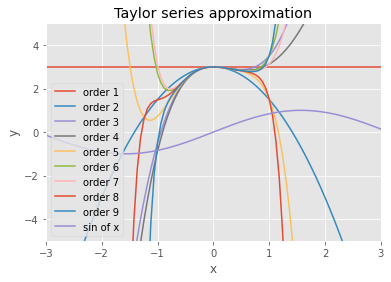

[]


In [79]:
# Plot results
def plot():
    x_lims = [-3,3]
    x1 = np.linspace(x_lims[0],x_lims[1],100)
    y1 = []
    y2 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1,10,1):
        func = taylor(f,0,j)
#         print("J:", func)
        print('Taylor expansion at n='+str(j),func)
        y1_val = 0
        for k in x1:
            y1_val = func.subs(x,k)
            y1.append(func.subs(x,k))
#             print('y1:',y1)
#         print('y1:',y1)
        plt.plot(x1,y1,label='order '+str(j))
        print("Values:",y1_val)
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1,np.sin(x1),label='sin of x')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()
    
    return y2

y2 = plot()
print(y2)

In [80]:
# # loop through tayloer terms
# for term in range(len(y1)):
#     # build up polynomial on each iteration
#     _poly = _terms[term] if _poly is None else _poly + _terms[term]

#     # store current taylor polynomial
#     polynomials.append(_poly)


Terms: [1.14472988584940, 0.318309886183791*t - 1.0, -0.5*(0.318309886183791*t - 1)**2, 0.333333333333333*(0.318309886183791*t - 1)**3, -0.25*(0.318309886183791*t - 1)**4]
Polys: [1.14472988584940, 0.318309886183791*t + 0.1447298858494, 0.318309886183791*t - 0.5*(0.318309886183791*t - 1)**2 + 0.1447298858494, 0.318309886183791*t + 0.333333333333333*(0.318309886183791*t - 1)**3 - 0.5*(0.318309886183791*t - 1)**2 + 0.1447298858494, 0.318309886183791*t - 0.25*(0.318309886183791*t - 1)**4 + 0.333333333333333*(0.318309886183791*t - 1)**3 - 0.5*(0.318309886183791*t - 1)**2 + 0.1447298858494]


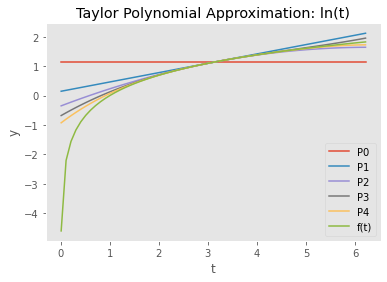

  symbolic_derivatives                                    taylor_terms  \
0               log(a)                                1.14472988584940   
1                  1/a                       0.318309886183791*t - 1.0   
2              -1/a**2               -0.5*(0.318309886183791*t - 1)**2   
3               2/a**3  0.333333333333333*(0.318309886183791*t - 1)**3   
4              -6/a**4              -0.25*(0.318309886183791*t - 1)**4   

                                         polynomials  
0                                   1.14472988584940  
1              0.318309886183791*t + 0.1447298858494  
2  0.318309886183791*t - 0.5*(0.318309886183791*t...  
3  0.318309886183791*t + 0.333333333333333*(0.318...  
4  0.318309886183791*t - 0.25*(0.318309886183791*...  


In [81]:
import math
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t, a = sp.symbols('t a')


def taylor_terms(func, order, point, derivatives=None):
    """
    find symbolic derivatives and Taylor terms
    func: symbolic function to approximate
    order: highest order derivative for Taylor polynomial (interger)
    point: point about which the function is approximated
    derivatives: list of symbolic derivatives
    """

    # initialize list of derivatives
    if derivatives is None:
        derivatives = [func.subs({t: a})]

    # check if highest order derivative is reached
    if len(derivatives) > order:
        # return list of taylor terms evaluated using substitution
        return derivatives, [derivatives[i].subs({a: point}) / math.factorial(i) * (t - point) ** i for i in range(len(derivatives))]

    # differentiate function with respect to t
    derivative = func.diff(t)

    # append to list of symbolic derivatives ** substitute t with a **
    derivatives.append(derivative.subs({t: a}))

    # recursive call to find next term in Taylor polynomial
    return taylor_terms(derivative, order, point, derivatives)


def taylor_polynomials(_terms):
    """
    find Taylor polynomials
    func: symbolic function to approximate
    order: highest order derivative for Taylor polynomial (interger)
    point: point about which the function is approximated
    derivatives: list of Taylor terms
    """

    # initialize list
    polynomials = []

    # initialize taylor polynomial
    _poly = None

    # loop through tayloer terms
    for term in range(len(_terms)):
        # build up polynomial on each iteration
        _poly = _terms[term] if _poly is None else _poly + _terms[term]

        # store current taylor polynomial
        polynomials.append(_poly)

    # return taylor polynomials
    return polynomials


if __name__ == '__main__':

    # analysis label
    label = 'ln(t)'

    # symbolic function to approximate
    f = sp.log(t)

    # point about which to approximate
    approximation_point = np.pi

    # definte time start and stop
    start = 0.01
    stop = 2 * sp.pi
    time = np.arange(start, stop, 0.1)

    # find taylor polynomial terms describing function f(t)
    symbolic_derivatives, terms = taylor_terms(func=f, order=4, point=approximation_point)
    print("Terms:", terms)
    polys = taylor_polynomials(terms)
    print('Polys:', polys)

    # initialize plot
    fig, ax = plt.subplots()
    ax.set(xlabel='t', ylabel='y', title=f'Taylor Polynomial Approximation: {label}')
    legend = []

    for p, poly in enumerate(polys):
        # plot current polynomial approximation
        ax.plot(time, [poly.subs({t: point}) for point in time])

        # append item to legend
        legend.append(f'P{p}')

    # plot actual function for comparison
    ax.plot(time, [f.subs({t: point}) for point in time])
    legend.append(f'f(t)')

    # create dataframe
    df = pd.DataFrame({'symbolic_derivatives': symbolic_derivatives,
                       'taylor_terms': terms,
                       'polynomials': polys
                       })

    # save and show results
    ax.legend(legend)
    ax.grid()
    plt.savefig(f'taylor_{label}.png')
    plt.show()
    
    df.to_csv(f'taylor_{label}.csv', encoding='utf-8')
    print(df.head(10))